<a href="https://colab.research.google.com/github/Jb-rown/Collab_Projects/blob/main/Deep_Learning_MNIST_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - MNIST Digit Classification

## Step 1: Import libraries

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)
print("Libaries imported successfuly!")




TensorFlow version: 2.18.0
Libaries imported successfuly!


## Step 2: Load the MNIST Dataset

In [2]:
# load the MNIST dataset
print("\n=== LOADING MNIST DATASET ===")
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("MNIST Dataset loaded successfully")

# Print dataset information
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"Class labels: {np.unique(y_train)}")



=== LOADING MNIST DATASET ===
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MNIST Dataset loaded successfully
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10
Class labels: [0 1 2 3 4 5 6 7 8 9]


## Step 3: Data Exploration - Visualize Random Images


=== DATA EXPLORATION ===


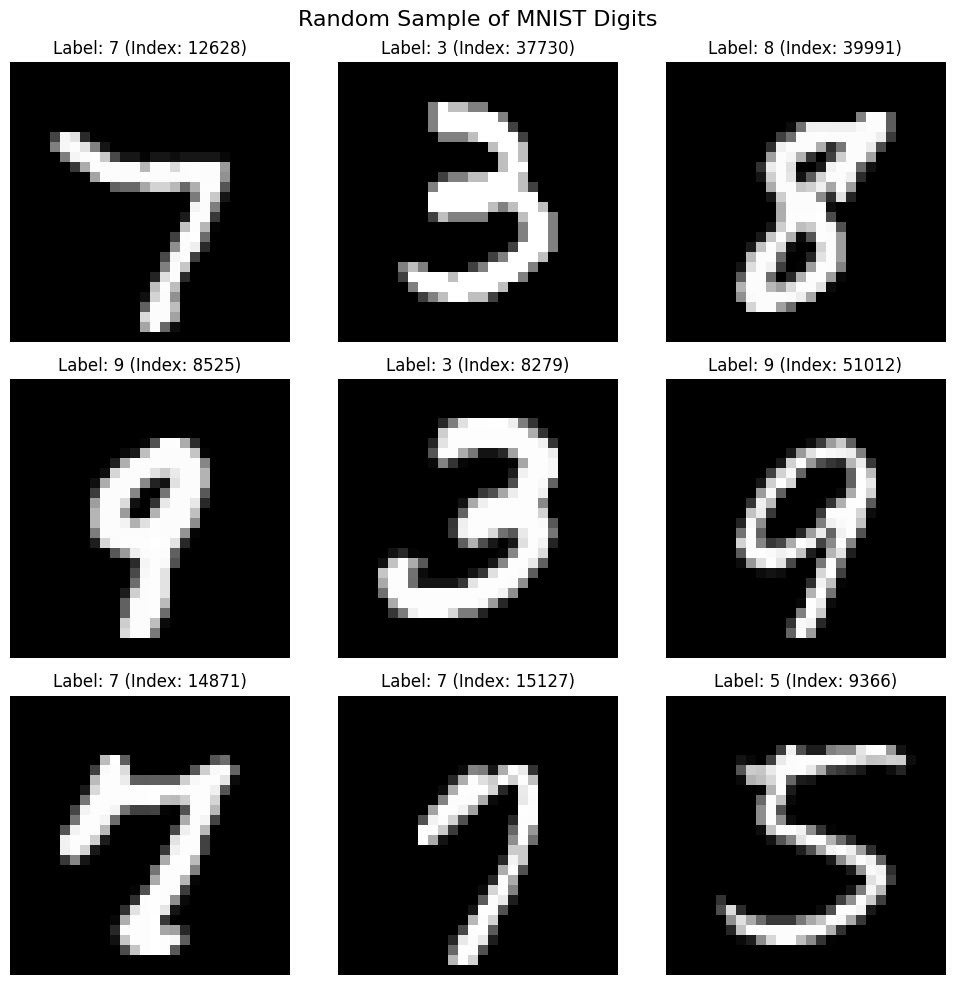

Original pixel value range: [0, 255]


In [3]:
# Data Exploration - Visualize Random Images
print("\n=== DATA EXPLORATION ===")

# Select 9 random images for visualization
np.random.seed(42)  # For reproducible random selection
random_indices = np.random.choice(X_train.shape[0], 9, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]} (Index: {idx})")
    plt.axis('off')

plt.suptitle('Random Sample of MNIST Digits', fontsize=16)
plt.tight_layout()
plt.show()

# Display pixel value ranges before normalization
print(f"Original pixel value range: [{X_train.min()}, {X_train.max()}]")

## Step 4: Data Preprocessing

In [4]:
# Data Preprocessing
print("\n=== DATA PREPROCESSING ===")

# Normalize pixel values to [0,1] range
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

print(f"Normalized pixel value range: [{X_train_normalized.min()}, {X_train_normalized.max()}]")

# One-hot encode the labels
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"Original label shape: {y_train.shape}")
print(f"One-hot encoded label shape: {y_train_categorical.shape}")
print(f"Example - Original label: {y_train[0]}")
print(f"Example - One-hot encoded: {y_train_categorical[0]}")

# Confirm preprocessing
print("\n=== PREPROCESSING CONFIRMATION ===")
print(f"Training images shape: {X_train_normalized.shape}")
print(f"Training labels shape: {y_train_categorical.shape}")
print(f"Test images shape: {X_test_normalized.shape}")
print(f"Test labels shape: {y_test_categorical.shape}")


=== DATA PREPROCESSING ===
Normalized pixel value range: [0.0, 1.0]
Original label shape: (60000,)
One-hot encoded label shape: (60000, 10)
Example - Original label: 5
Example - One-hot encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

=== PREPROCESSING CONFIRMATION ===
Training images shape: (60000, 28, 28)
Training labels shape: (60000, 10)
Test images shape: (10000, 28, 28)
Test labels shape: (10000, 10)


## Step 5: Build the ANN Model

In [5]:
# Build the ANN Model
print("\n=== BUILDING ANN MODEL ===")

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer: flatten 28x28 to 784
    Dense(128, activation='relu'),   # First hidden layer: 128 neurons
    Dropout(0.3),                   # Dropout for regularization
    Dense(64, activation='relu'),    # Second hidden layer: 64 neurons
    Dropout(0.3),                   # Dropout for regularization
    Dense(10, activation='softmax')  # Output layer: 10 neurons (classes)
])

# Display model architecture
print("Model Architecture:")
model.summary()


=== BUILDING ANN MODEL ===
Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Step 6: Compile the Model

In [6]:
#  Compile the Model
print("\n=== COMPILING MODEL ===")
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("Model compiled with Adam optimizer, categorical crossentropy loss, and accuracy metric")




=== COMPILING MODEL ===
Model compiled with Adam optimizer, categorical crossentropy loss, and accuracy metric


## Step 7: Train the Model

In [7]:

#  Train the Model
print("\n=== TRAINING MODEL ===")
print("Training for 10 epochs with batch size 128 and 10% validation split...")

history = model.fit(
    X_train_normalized, y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

print("Training completed!")


=== TRAINING MODEL ===
Training for 10 epochs with batch size 128 and 10% validation split...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7129 - loss: 0.9087 - val_accuracy: 0.9545 - val_loss: 0.1602
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9189 - loss: 0.2692 - val_accuracy: 0.9647 - val_loss: 0.1183
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9389 - loss: 0.2023 - val_accuracy: 0.9712 - val_loss: 0.1001
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9500 - loss: 0.1659 - val_accuracy: 0.9735 - val_loss: 0.0878
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9583 - loss: 0.1413 - val_accuracy: 0.9748 - val_loss: 0.0823
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9600 - loss: 0.1343 - val_accuracy: 0.9778 - val_loss: 0.0743
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9648 - loss: 0.1180 - val_accuracy: 0.9787 - val_loss: 0.0737
Epoch 8/1

## Step 8: Evaluate the Test Set

In [8]:
#  Evaluate on Test Set
print("\n=== MODEL EVALUATION ===")
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_categorical, verbose=0)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


=== MODEL EVALUATION ===
Final Test Loss: 0.0766
Final Test Accuracy: 0.9762 (97.62%)


## Step 9: Visualize the Training History


=== TRAINING HISTORY VISUALIZATION ===


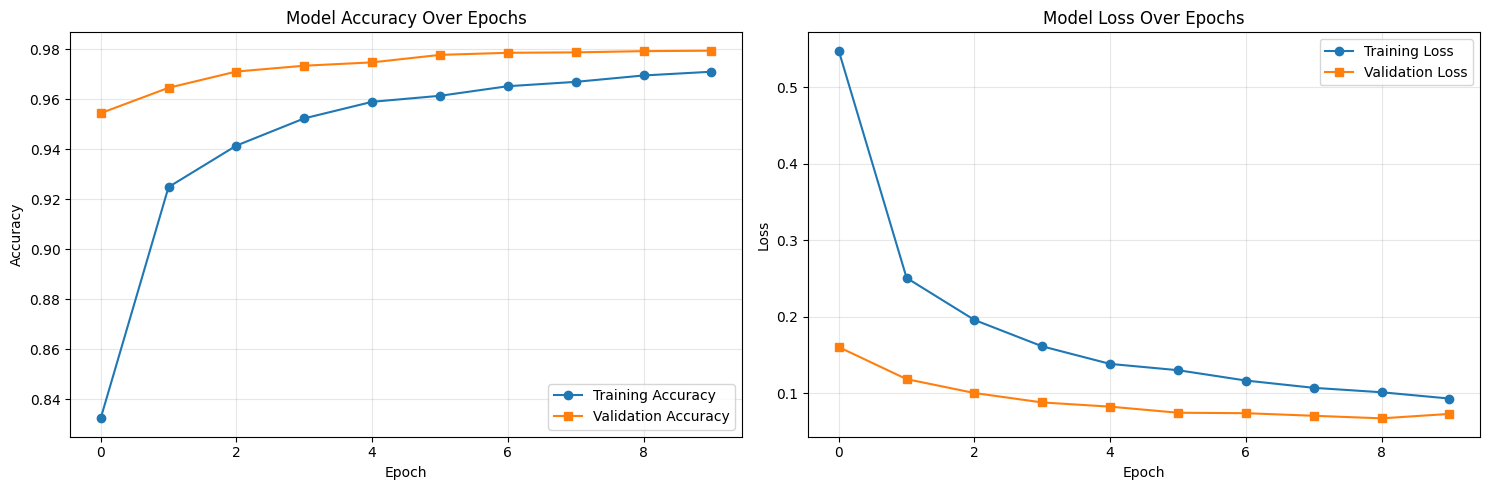

In [9]:
# Visualize Training History
print("\n=== TRAINING HISTORY VISUALIZATION ===")

# Create subplots for accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training and validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
ax1.set_title('Model Accuracy Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot training and validation loss
ax2.plot(history.history['loss'], label='Training Loss', marker='o')
ax2.plot(history.history['val_loss'], label='Validation Loss', marker='s')
ax2.set_title('Model Loss Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 10: Make Predictions and Create Confusion Matrix


=== PREDICTIONS AND CONFUSION MATRIX ===


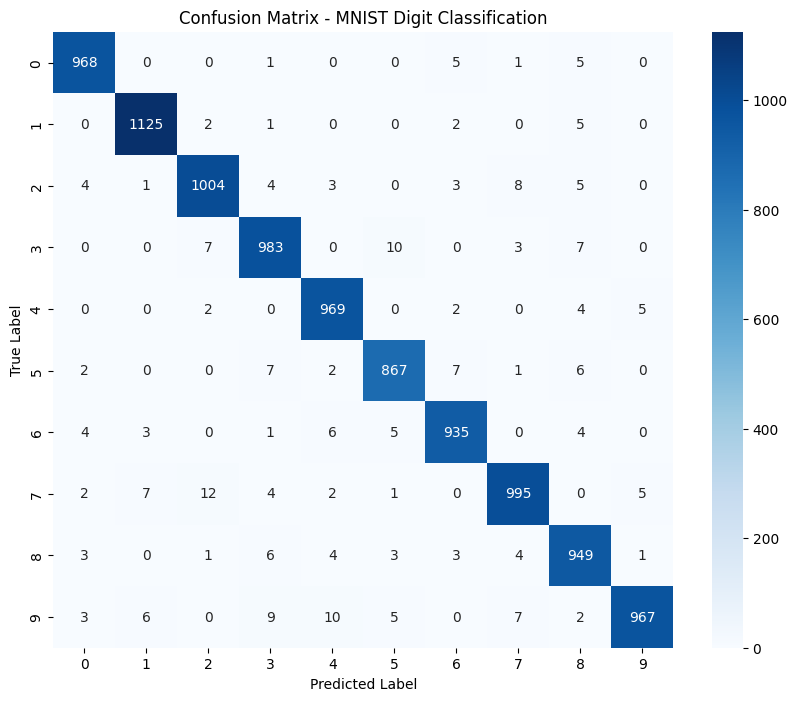

Per-class accuracy:
Digit 0: 0.9878 (98.78%)
Digit 1: 0.9912 (99.12%)
Digit 2: 0.9729 (97.29%)
Digit 3: 0.9733 (97.33%)
Digit 4: 0.9868 (98.68%)
Digit 5: 0.9720 (97.20%)
Digit 6: 0.9760 (97.60%)
Digit 7: 0.9679 (96.79%)
Digit 8: 0.9743 (97.43%)
Digit 9: 0.9584 (95.84%)


In [10]:
# Make Predictions and Create Confusion Matrix
print("\n=== PREDICTIONS AND CONFUSION MATRIX ===")

# Make predictions on test set
y_pred = model.predict(X_test_normalized, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - MNIST Digit Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate per-class accuracy
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("Per-class accuracy:")
for i, acc in enumerate(per_class_accuracy):
    print(f"Digit {i}: {acc:.4f} ({acc*100:.2f}%)")


## Step 11: Classification Report

In [11]:
# Classification Report
print("\n=== DETAILED CLASSIFICATION REPORT ===")
report = classification_report(y_test, y_pred_classes)
print(report)


=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Step 12: Save and Reload Model

In [12]:
# Save and Reload Model
print("\n=== SAVING AND RELOADING MODEL ===")

# Save model in modern Keras format
model.save("mnist_ann_model.keras")
print("Model saved as 'mnist_ann_model.keras'")

# Also save in H5 format for compatibility
model.save("mnist_ann_model.h5")
print("Model also saved as 'mnist_ann_model.h5'")

# Load and test the saved model
from tensorflow.keras.models import load_model

print("Reloading model...")
reloaded_model = load_model("mnist_ann_model.keras")

# Verify the reloaded model works
reloaded_loss, reloaded_accuracy = reloaded_model.evaluate(X_test_normalized, y_test_categorical, verbose=0)
print(f"Reloaded model test accuracy: {reloaded_accuracy:.4f}")



=== SAVING AND RELOADING MODEL ===
Model saved as 'mnist_ann_model.keras'
Model also saved as 'mnist_ann_model.h5'
Reloading model...
Reloaded model test accuracy: 0.9762


## Step 13: Additionally Analysis - Sample Prredictions


=== SAMPLE PREDICTIONS ANALYSIS ===


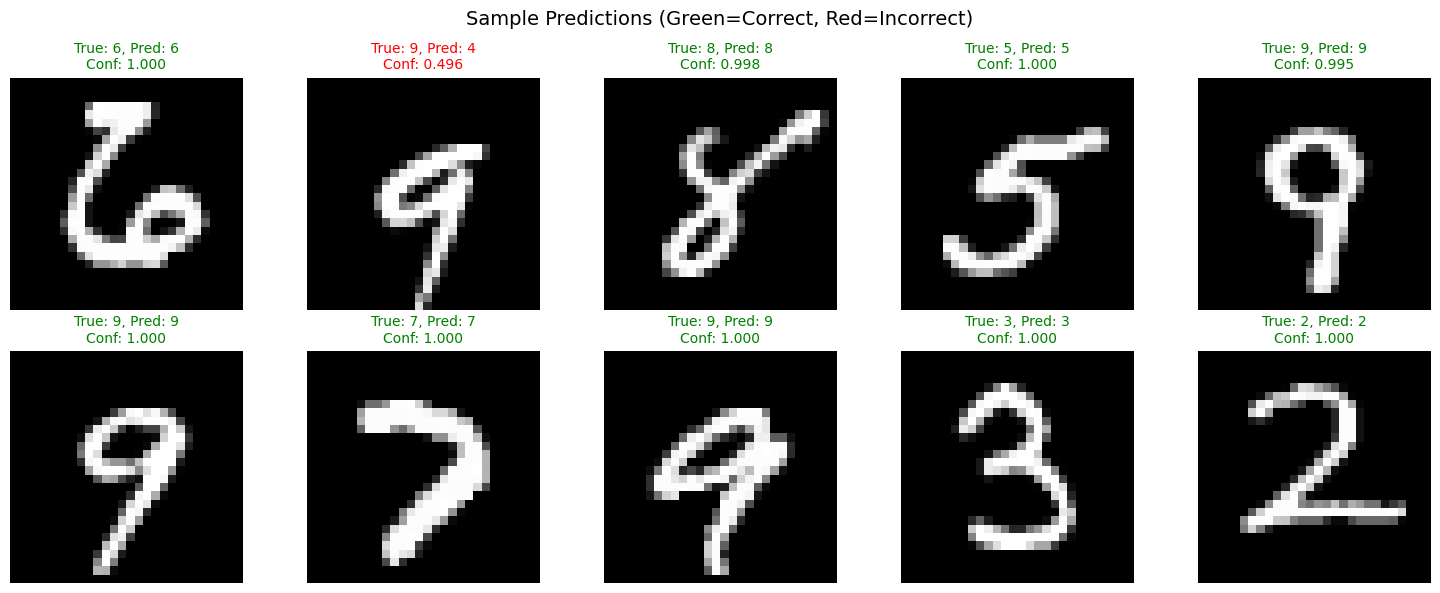


=== FINAL PERFORMANCE SUMMARY ===
Model Architecture: Input(784) -> Dense(128) -> Dropout(0.3) -> Dense(64) -> Dropout(0.3) -> Output(10)
Total Parameters: 109,386
Training Accuracy: 0.9711
Validation Accuracy: 0.9795
Final Test Accuracy: 0.9762
Training completed in 10 epochs
Model saved successfully in both .keras and .h5 formats


In [13]:
# Additional Analysis - Sample Predictions
print("\n=== SAMPLE PREDICTIONS ANALYSIS ===")

# Show some test images with predictions
plt.figure(figsize=(15, 6))

# Select some test samples
sample_indices = np.random.choice(X_test.shape[0], 10, replace=False)

for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')

    # Get prediction
    pred_probs = model.predict(X_test_normalized[idx:idx+1], verbose=0)[0]
    pred_class = np.argmax(pred_probs)
    confidence = pred_probs[pred_class]

    # Set title color based on correctness
    color = 'green' if pred_class == y_test[idx] else 'red'
    plt.title(f'True: {y_test[idx]}, Pred: {pred_class}\nConf: {confidence:.3f}',
              color=color, fontsize=10)
    plt.axis('off')

plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)', fontsize=14)
plt.tight_layout()
plt.show()

# Step 14: Model Performance Summary
print("\n=== FINAL PERFORMANCE SUMMARY ===")
print(f"Model Architecture: Input(784) -> Dense(128) -> Dropout(0.3) -> Dense(64) -> Dropout(0.3) -> Output(10)")
print(f"Total Parameters: {model.count_params():,}")
print(f"Training Accuracy: {max(history.history['accuracy']):.4f}")
print(f"Validation Accuracy: {max(history.history['val_accuracy']):.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")
print(f"Training completed in 10 epochs")
print("Model saved successfully in both .keras and .h5 formats")

